In [1]:
import pandas as pd
import numpy as np
import keras

import warnings
warnings.filterwarnings('ignore')

Let's download the data and read it into a <em>pandas</em> dataframe.


In [29]:
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv'
df_data = pd.read_csv(filepath)

df_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [30]:
df_data.shape

(1030, 9)

In [31]:
df_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [32]:
## No null values are present

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


In [33]:
df_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [34]:
df_columns = df_data.columns

In [35]:
X = df_data.drop(columns = ['Strength'], axis = 1) # all columns except Strength
y = df_data['Strength'] # Strength column

<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [36]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [37]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [38]:
n_cols = X.shape[1] # number of predictors
n_cols

8

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [58]:

def regression_model():
    model = Sequential()
    
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    model.compile(optimizer = 'adam', loss='mean_squared_error')
    return model
    

In [59]:
model = regression_model()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, X_Val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


In [60]:
def mean_mse(n, epochs):

    mse_list = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

        model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = epochs, verbose = False)

        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)

        mse_list.append(mse)
    
    return mse_list

In [61]:
print(mean_mse(50, 50))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

In [62]:
import numpy as np

mse_list = [234.46416371596254, 106.01807466173972, 108.65696905821699, 101.63891673441897, 96.20914420093415, 93.875193718704, 86.08451333991323, 80.804337896524, 67.16492393255652, 59.92575844623701, 55.930297050328335, 61.732686017940686, 57.96915831307706, 55.14968249981849, 56.79931748275669, 52.37428682852927, 50.42255721537638, 59.71476235431244, 50.101770704644586, 69.37594168420466, 55.81391766220575, 50.26867613063781, 49.03538846224138, 64.94863989774373, 56.619326409686394, 48.6796931299676, 49.497508559876465, 58.675923616175474, 52.58295344740239, 49.51424163244368, 52.77803013303606, 55.110338576348575, 50.08657452377221, 48.89422160749436, 48.630334747306996, 48.51308600663052, 75.30441713277357, 55.63447767304194, 49.962386554366844, 48.616316479130866, 50.14879691331163, 54.75577163200287, 49.72173905568266, 53.77129679954832, 48.48950078238613, 48.498900440331454, 50.45562067160955, 50.57483079289668, 52.73768520703014, 50.05016457781719]

print(type(mse_list))


<class 'list'>


In [64]:
mse_x = np.mean(mse_list)
mse_y = np.std(mse_list)

print(f"Mean: {mse_x}, Std Dev: {mse_y}")

Mean: 63.65566430222189, Std Dev: 29.18440995925449


In [65]:
### Phase - 2 Trying the normalized data

In [66]:
X_std = (X - X.mean()) / X.std()
X_std.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [67]:

n_cols = X_std.shape[1] # number of predictors
n_cols

8

In [68]:


mse_new_list = []

for i in range(50):

    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

    model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 50, verbose = False)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_new_list.append(mse)
    
print(mse_new_list)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

In [81]:
norm_mse_list = [672.0388983568672, 294.05387663578364, 143.33305800062857, 115.57544037723754, 111.75979752265633, 108.80093213973363, 105.19163770703784, 100.05305594762689, 93.87271172153346, 87.28746082675134, 80.75198126256358, 74.87211367314796, 69.66356616450386, 65.47536981666588, 62.33609814443647, 59.523090487712714, 57.34100132174667, 55.96182866630546, 54.60236288495823, 53.54975956111991, 52.36026553032222, 51.54322447257493, 50.85955396521732, 50.248044803535684, 49.530525303493306, 49.05461574282247, 48.49127730576736, 48.06198724522338, 47.48897780044873, 47.129707875668686, 46.609092358681224, 46.557538263270494, 45.83575693281327, 45.77425644993495, 45.314127015876316, 45.010817593200336, 44.66523694218192, 44.66309108434802, 44.443586008735686, 44.28013798037742, 44.063221868229625, 43.88657913701144, 43.90534378126326, 43.5984415295389, 43.54283111406369, 43.52238769946316, 43.3543355830749, 43.211205124528, 43.227755758000754, 43.03574575696716]

print(np.mean(norm_mse_list))
print(np.std(norm_mse_list))

76.98627418491304
94.07053441359177


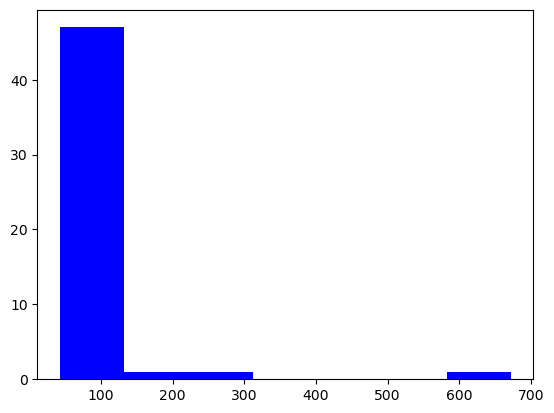

In [87]:
import matplotlib.pyplot as plt

plt.hist(x = norm_mse_list, color = 'blue', bins = 7)
plt.show()

#### use 100 epochs this time for training.

<a id='item32'></a>


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from sklearn.model_selection import train_test_split

In [89]:

mse_new_list = []
epoch_100_model = regression_model()

for i in range(50):

    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 2)

    epoch_100_model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 100, verbose = False)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mse_new_list.append(mse)
    
print(mse_new_list)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [90]:
print(np.mean(mse_new_list))

22.20103002582351


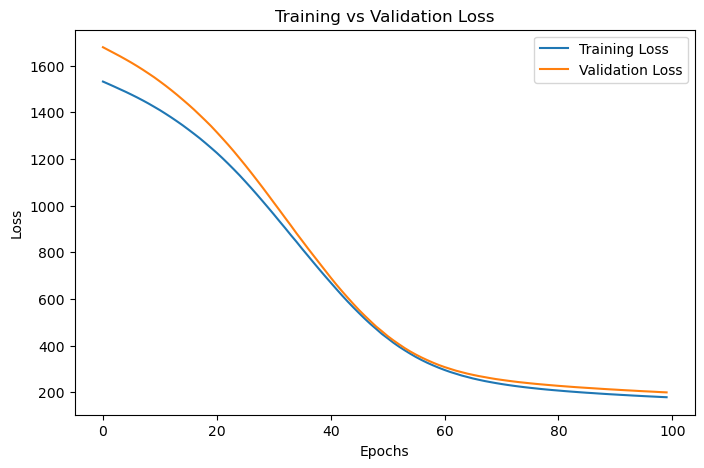

In [91]:
## Plotting training vs validation loss to check overfitting


e_100_model = regression_model()

history = e_100_model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=100, 
    verbose=False
)


train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training vs Validation Loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

<a id='item33'></a>


##### Building aneural network pattern

In [73]:

# define regression model
def cnn_regression_model():
    # create model
    model = Sequential()
    model.add(Input(shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

<a id="item4"></a>


#### Train and Test the Network


In [76]:

# build the model
model = cnn_regression_model()

In [77]:
# fit the model
three_mse_list = []

for i in range(50):
    
### Splitting into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=42)

    ## Splitting the training data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=42)
    model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, verbose=False)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)

    three_mse_list.append(mse)
    

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [80]:
print(three_mse_list)



[104.44483866312511, 78.24708848108261, 73.0366526146993, 68.46917053888808, 62.027549249013575, 55.004385422861745, 49.52868740852718, 44.31455441636497, 39.06754019070133, 37.57298246504528, 36.40646422745357, 35.98348663706153, 35.08629381517891, 35.23908632502659, 34.51927724459677, 33.79658160095731, 33.50676920808276, 34.24808465564465, 34.48609396153845, 34.419210444630906, 33.17110386068965, 33.68355754760505, 33.18754020402433, 33.61363594623309, 34.31224898955675, 33.67742517559921, 35.170874733451846, 33.92422582613006, 34.2864902730395, 35.27724779301468, 34.99497905432625, 35.08374430384985, 35.432335545810524, 35.06846166848005, 35.8161947591777, 35.16364809958143, 34.719056889247746, 34.84522551659859, 34.932491068493896, 35.132657236122675, 35.43765113374644, 35.14864383819133, 36.38865727992048, 35.186688790280776, 34.836119082018556, 35.69562342109141, 35.16065881078947, 35.431585514091765, 34.53288712890104, 34.80371138349469]


In [79]:
print(np.mean(three_mse_list))
print(np.std(three_mse_list))

40.07040336888078
13.74964011889333


In [ ]:
### This is the end of this project

In [89]:
test_loss = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss}")

10/10 - 0s - 11ms/step - loss: 105.8367
Test Loss (MSE): 105.8366928100586


In [90]:
X_train.mean()

Cement                0.008300
Blast Furnace Slag   -0.016204
Fly Ash               0.011703
Water                 0.006248
Superplasticizer      0.000237
Coarse Aggregate      0.014261
Fine Aggregate       -0.013141
Age                   0.009636
dtype: float64

In [107]:

### Developing a 5 layer network with 50 nodes in each hidden layer

def reg_model():
    model = Sequential()
    model.add(Input(shape = (n_cols,)))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(1))

    model.compile(optimizer= 'adam', loss = 'mean_squared_error')
    return model



In [108]:

model = reg_model()

model.fit(X_train, y_train,  epochs = 70, validation_data = (X_val, y_val), verbose= 2)

Epoch 1/70
18/18 - 3s - 168ms/step - loss: 1553.9705 - val_loss: 1494.6523
Epoch 2/70
18/18 - 0s - 13ms/step - loss: 1298.2616 - val_loss: 969.9628
Epoch 3/70
18/18 - 0s - 12ms/step - loss: 511.9559 - val_loss: 404.4744
Epoch 4/70
18/18 - 0s - 13ms/step - loss: 274.1971 - val_loss: 240.4105
Epoch 5/70
18/18 - 0s - 13ms/step - loss: 215.0773 - val_loss: 213.7638
Epoch 6/70
18/18 - 0s - 13ms/step - loss: 192.9913 - val_loss: 202.9961
Epoch 7/70
18/18 - 0s - 13ms/step - loss: 178.6821 - val_loss: 193.5481
Epoch 8/70
18/18 - 0s - 16ms/step - loss: 165.8596 - val_loss: 187.8308
Epoch 9/70
18/18 - 0s - 17ms/step - loss: 158.0285 - val_loss: 173.1501
Epoch 10/70
18/18 - 0s - 14ms/step - loss: 145.8719 - val_loss: 169.3946
Epoch 11/70
18/18 - 0s - 12ms/step - loss: 138.1277 - val_loss: 160.9310
Epoch 12/70
18/18 - 0s - 13ms/step - loss: 124.4787 - val_loss: 150.6331
Epoch 13/70
18/18 - 0s - 13ms/step - loss: 114.1429 - val_loss: 139.8368
Epoch 14/70
18/18 - 0s - 11ms/step - loss: 104.5070 - va

In [112]:
## On training data 
train_loss = model.evaluate(X_train, y_train, verbose=2)

print(f"Train Loss (MSE): {train_loss}")

18/18 - 0s - 7ms/step - loss: 16.1640
Train Loss (MSE): 16.16401481628418


In [110]:
test_loss = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss (MSE): {test_loss}")

10/10 - 0s - 39ms/step - loss: 42.8469
Test Loss (MSE): 42.846920013427734


In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(576, 8)
(309, 8)
(576,)
(309,)


In [121]:
X_new = np.random.uniform(-1, 1, (10, 8))

print(X_new[:10])

print()
print()
model.predict(X_new)



[[-0.0089171  -0.22884755  0.11022199 -0.81701182 -0.36030313  0.6604747
   0.45958964 -0.68247138]
 [-0.14079756  0.52228693  0.6780087  -0.46588226 -0.17071175 -0.68316824
   0.9911349   0.90726789]
 [-0.15642022 -0.28398306  0.90154867 -0.20179677 -0.04814134  0.27511358
  -0.46390098  0.97237378]
 [-0.29048665  0.95625696 -0.35924229  0.89446685 -0.95335604  0.50844716
   0.01918683 -0.65932801]
 [-0.01916932  0.10789008 -0.3361053   0.04126553  0.20704575  0.42765103
   0.08689653 -0.17766041]
 [-0.56526014 -0.21673904  0.9256888   0.33295119  0.72571868  0.9422541
  -0.09437202 -0.74084936]
 [ 0.0023322   0.92338577  0.46228383  0.71616365 -0.00163412 -0.04363412
   0.90065183 -0.80468663]
 [-0.44725405 -0.8897387  -0.07155872  0.77423948  0.64407104  0.26119188
  -0.85041613  0.85330676]
 [ 0.26801402 -0.13952812  0.02672863 -0.90567728  0.36106811  0.37306503
  -0.2986475   0.90301636]
 [ 0.0299281   0.99539147  0.61436061 -0.10500046  0.52972249 -0.15955123
   0.53864152 -0.34

array([[17.80837 ],
       [59.86253 ],
       [51.541992],
       [26.070818],
       [44.073936],
       [14.256024],
       [33.939285],
       [30.402847],
       [58.755474],
       [56.568436]], dtype=float32)